In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


### Exploring dataset

In [6]:
df = pd.read_csv('jeopardy.csv')
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [8]:
df.columns = ['show_n', 'date', 'round', 'category', 'price', 'question','answer']

In [9]:
print(df.date.max(),df.date.min())

2012-01-27 1984-09-10


### Creating new column with price value as float

In [10]:
df['pricef'] = df.price.apply( lambda x: x.lstrip('$').replace(',','')
                                        if not 'None' in x else x.replace('None','0')).astype(float)

### Creating function to determine the number of times a word(s) has been mentioned in the questions

In [13]:
import re
def test(data,s):
    
        
    data['question']=data.question.astype(str).str.lower()
    data['check'] = data.question.apply(lambda x: all(re.search((r'\b'+(w.lower())+r's*\'*\b'),x) for w in s))
    data['check']=data.check.astype(str)
    data1 = data.loc[data.check == 'True']
    data1.drop(['check'], axis=1, inplace=True)
    return data1

In [14]:
df_test = test(df,['King','England'])
df_test.head()

C:\Users\matte\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,show_n,date,round,category,price,question,answer,pricef
4953,3003,1997-09-24,Double Jeopardy!,"""PH""UN WORDS",$200,"both england's king george v & fdr put their stamp of approval on this ""king of hobbies""",Philately (stamp collecting),200.0
6337,3517,1999-12-14,Double Jeopardy!,Y1K,$800,"in retaliation for viking raids, this ""unready"" king of england attacks norse areas of the isle of man",Ethelred,800.0
9191,3907,2001-09-04,Double Jeopardy!,WON THE BATTLE,$800,this king of england beat the odds to trounce the french in the 1415 battle of agincourt,Henry V,800.0
11710,2903,1997-03-26,Double Jeopardy!,BRITISH MONARCHS,$600,"this scotsman, the first stuart king of england, was called ""the wisest fool in christendom""",James I,600.0
13454,4726,2005-03-07,Jeopardy!,A NUMBER FROM 1 TO 10,$1000,it's the number that followed the last king of england named william,4,1000.0


In [15]:
df_test_1 = test(df,['King'])
df_test_1.pricef.mean()

C:\Users\matte\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


805.3456032719837

### Creating function to determine average price value of word(s) mentioned in the questions 

In [16]:
def price_words(lst):
    values = []
    index = []
    d = {name: test(df,[name]) for name in lst}
    for i in d.values():
        value = i.pricef.mean()
        values.append(value)
    for name in lst:
        index.append(name)
    d1 = {index[i]:values[i] for i in range(len(lst))}
    ser = pd.Series(data = d1, index= index)
    color =[]
    for i in range(len(index)):
        color.append('C'+str(i))
    ax = ser.plot.barh(color=color)
    ax.set_ylabel('Words')
    ax.set_xlabel('Price US$')
    return plt.show()

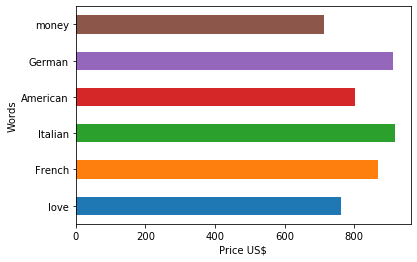

In [17]:
fig = price_words(['love','French','Italian','American','German','money'])

### Creating function to determine the number of questions and the average price for a selected word

In [99]:
def price_overtime(word):
    df_8 = df.loc[df.date.str.contains('198',case=False)]
    df_9 = df.loc[df.date.str.contains('199',case=False)]
    df_0 = df.loc[df.date.str.contains('200',case=False)]
    df_1 = df.loc[df.date.str.contains('201',case=False)]
    d = {'df_8':test(df_8,word),'df_9':test(df_9,word),'df_0':test(df_0,word),'df_1':test(df_1,word)}
    
    #d={name:test(name,word[0]) for name in di.items()}
    all_d = pd.merge(df_8,df_9, how ='outer')
    all_d = pd.merge(all_d,df_0, how ='outer')
    all_d = pd.merge(all_d,df_1, how ='outer')
    all_d['time'] = all_d.date.apply( lambda x: 'Eighties' if '198' in x else
                                          ('Ninenties' if '199' in x else ('Two-thousands' if '200' in x 
                                                                           else 'Two-twousand tens')))
    all_g = all_d.groupby(['time']).question.count().reset_index()
    avg_p = []
    for i in d.values():
        avg = i.pricef.mean()
        avg_p.append(avg)
    all_g.insert(2,'price',avg_p, True)
    all_g.set_index('time', inplace=True)
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    width = 0.4

    all_g.question.plot(kind='bar', color='red', ax=ax, width=width, position=1, rot=0)
    all_g.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0,rot = 0)

    ax.set_ylabel('Number of Questions')
    ax2.set_ylabel('Price Value')
    
    #plt.show()
    #ax = all_g.plot(kind='bar',secondary_y = 'price', rot= 0)
    ax.legend(bbox_to_anchor=(1.2, 1.21))
    ax2.legend(bbox_to_anchor=(1.15, 1.11))
    return all_g
    #return ax.plot()
    return plt.show()

C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\matte\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,question,price
time,,
Eighties,8108,383.333333
Ninenties,56745,472.527473
Two-thousands,123852,812.941176
Two-twousand tens,28225,833.333333


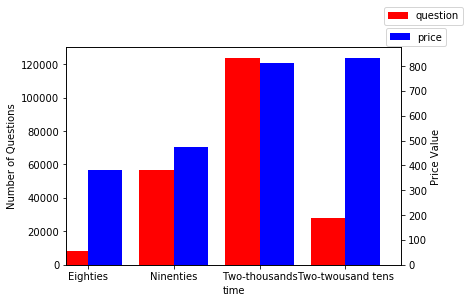

In [100]:
g = price_overtime(['computer'])
g

### Creating function to determine the frequency of word(s) in questions for each round 

In [126]:
def round_word(word):
    df_g = df.groupby(['category', 'round']).show_n.count().reset_index()
    df_g['category']=df_g.category.astype(str).str.lower()
    df_lit = df_g.loc[df_g.category.str.contains(word,case=False)]
    df_piv = df_lit.pivot_table(index='category', columns= 'round', values='show_n').fillna(0)
    title = 'Frequency of Questions with {} for Each Round'.format(word.title())
    ax = df_piv.plot(title = title)
    ax.axes.get_xaxis().set_ticks([])
    ax.set_ylabel('Frequency')
    return plt.show()

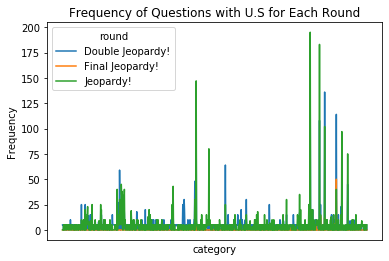

In [127]:
round_word('U.S')

In [96]:
df_high = df.loc[df.pricef > df.pricef.quantile(0.9)]
df_low = df.loc[df.pricef < df.pricef.quantile(0.1)]

In [97]:
pd.Series(' '.join(df_high['question']).lower().split()).value_counts()[:50]

the       14286
of        9422 
this      9382 
in        7953 
a         6987 
to        3944 
&         3388 
for       2931 
is        2787 
was       2265 
on        1883 
from      1791 
by        1415 
with      1359 
his       1341 
as        1302 
that      1233 
<a        1194 
an        1110 
name      1042 
he        1035 
it        1031 
at        999  
it's      894  
"the      797  
one       778  
these     760  
first     749  
clue      748  
(<a       723  
or        687  
crew      661  
who       653  
its       643  
are       637  
you       610  
named     508  
called    484  
her       461  
be        448  
seen      444  
when      441  
and       440  
has       426  
about     425  
like      416  
2         413  
title     412  
after     391  
city      384  
dtype: int64

In [166]:
char = 'England'
x = 'england\'s finests'
if re.search(r'\b'+char.lower()+r's*\'*\b',x):
    print('Yes')
else:
    print('No')

Yes
